In [1]:
import pandas as pd
import numpy as np
import random
import umap
from sentence_transformers import SentenceTransformer
from setup_utils import process_study1, process_study2, get_single_label, plotstuff, plot3dstuff, create_color_dict
%matplotlib notebook

In [2]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
set_seed()

In [3]:
study1 = pd.read_excel('data/Systematic Review - Classification of Arguments and Sample Origin.xlsx')
#You may need to run 
#sudo apt-get install python3-openpyxl 
#if you get an import error here

In [4]:
study2 = pd.read_excel('data/study_2_fact_checks.xlsx')

In [5]:
#remove last two irrelevant rows
processed_study1 = study1.drop(study1.tail(2).index,inplace=False)

In [6]:
specific = process_study1(processed_study1, 'Arguments: Specific level')

/home/bates/Desktop/umap_plots/setup_utils.py:60: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Arguments: Abstract level', 1)


In [7]:
specific

Arguments: Specific level  \
9     A belief that they had a low risk of infection...   
10    They adopted a healthy lifestyle that strength...   
11    They have a strengthened immune system as comp...   
14    Personal versus professional vaccination decision   
15                             Workplace policy changes   
...                                                 ...   
2061  Common rights such as speech, assembly, or aut...   
2062  Frames public health as a matter of individual...   
2063                                 My body, my choice   
2064                                  Religious freedom   
2065                                  Freedom of speech   

      Attitude root: Conspiracist ideation   Attitude root: Distrust \t  \
9                                       0.0                         0.0   
10                                      0.0                         0.0   
11                                      0.0                         0.0   
14                                      0.0                         0.0   
15                                      0.0                         0.0   
...                                     ...                         ...   
2061                                    0.0                         0.0   
2062                                    0.0                         0.0   
2063                                    0.0                         0.0   
2064                                    0.0                         0.0   
2065                                    0.0                         0.0   

      Attitude root: Unwarranted beliefs   \
9                                     0.0   
10                                    0.0   
11                                    0.0   
14                                    0.0   
15                                    0.0   
...                                   ...   
2061                                  0.0   
2062                                  0.0   
2063                                  0.0   
2064                                  0.0   
2065                                  0.0   

      Attitude root: Worldview and Politics  \
9                                       0.0   
10                                      0.0   
11                                      0.0   
14                                      0.0   
15                                      0.0   
...                                     ...   
2061                                    0.0   
2062                                    0.0   
2063                                    0.0   
2064                                    0.0   
2065                                    0.0   

      Attitude root: Religious Concerns  Attitude root: Moral concerns   \
9                                   0.0                             0.0   
10                                  0.0                             0.0   
11                                  0.0                             0.0   
14                                  0.0                             0.0   
15                                  0.0                             0.0   
...                                 ...                             ...   
2061                                0.0                             0.0   
2062                                0.0                             0.0   
2063                                0.0                             0.0   
2064                                1.0                             0.0   
2065                                0.0                             0.0   

      Attitude root: Fear and phobias   \
9                                  0.0   
10                                 0.0   
11                                 0.0   
14                                 0.0   
15                                 0.0   
...                                ...   
2061                               0.0   
2062                               0.0   
2063                               

In [8]:
specific_single = get_single_label(specific)

In [9]:
specific_single

text  single_labels
0     A belief that they had a low risk of infection...              7
1     They adopted a healthy lifestyle that strength...              7
2     They have a strengthened immune system as comp...              7
3     Personal versus professional vaccination decision             10
4                              Workplace policy changes             10
...                                                 ...            ...
1403  Common rights such as speech, assembly, or aut...             10
1404  Frames public health as a matter of individual...             10
1405                                 My body, my choice             10
1406                                  Religious freedom              4
1407                                  Freedom of speech             10

[1408 rows x 2 columns]

In [10]:
roots= ['Conspiracist Ideation','Distrust', 'Unwarranted Beliefs', 'Worldview and Politics', 'Religious Concerns',
          'Moral Concerns', 'Fear and Phobias', 'Distorted Risk Perception', 'Perceived Self-interest', 'Epistemic Relativism', 'Reactance']

In [11]:
specific_single['text_labels'] = [roots[i] for i in specific_single.single_labels.to_list()]

In [12]:
c_dict = create_color_dict()

In [13]:
c_dict

{'Conspiracist Ideation': 'red',
 'Distrust': 'orange',
 'Unwarranted Beliefs': 'black',
 'Worldview and Politics': 'purple',
 'Religious Concerns': 'blue',
 'Moral Concerns': 'green',
 'Fear and Phobias': 'brown',
 'Distorted Risk Perception': 'grey',
 'Perceived Self-interest': 'lime',
 'Epistemic Relativism': 'cyan',
 'Reactance': 'pink'}

In [14]:
model_type = 'paraphrase-mpnet-base-v2'
model_st = SentenceTransformer(model_type)

/home/bates/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [15]:
fit_2 = umap.UMAP(random_state=42)
fit_3 = umap.UMAP(n_components=3, random_state=42)

In [16]:
specific_embeddings = model_st.encode(specific_single.text.to_list())

In [17]:
specific_umap2 = fit_2.fit_transform(specific_embeddings)

<IPython.core.display.Javascript object>


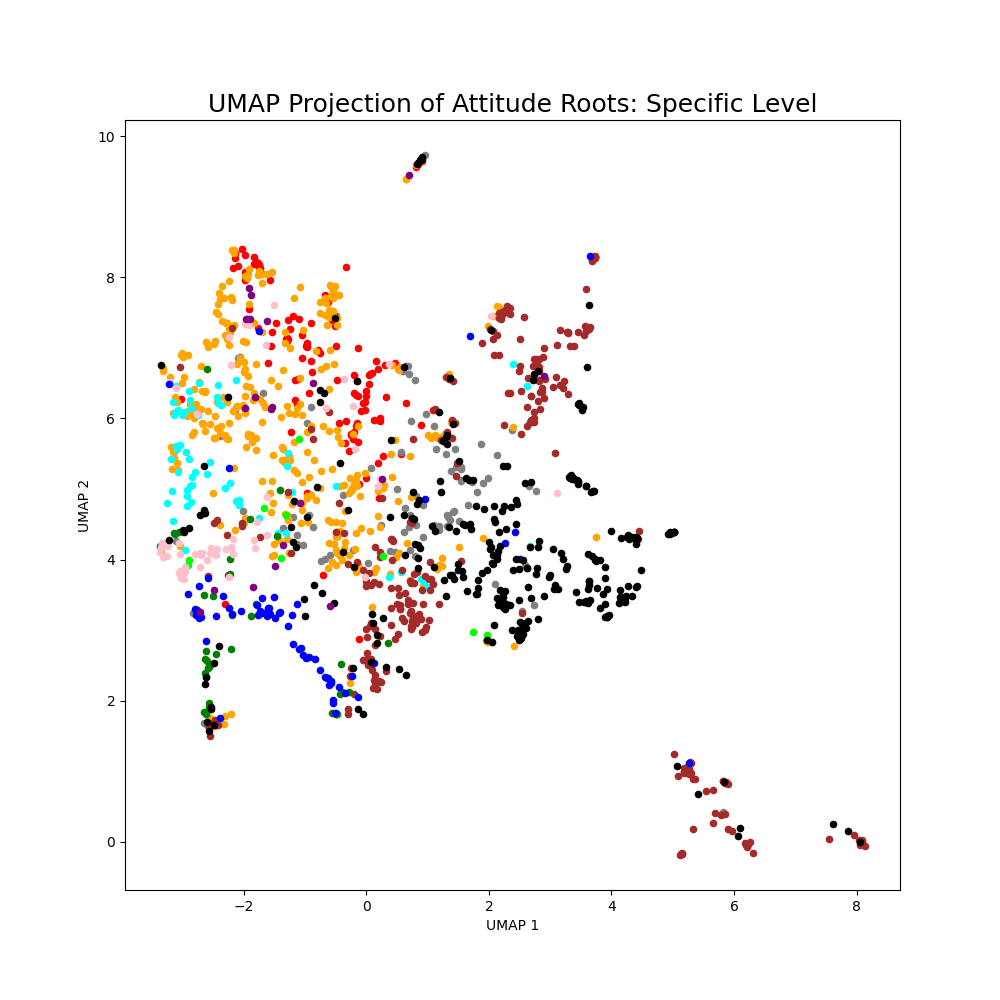

In [18]:
plotstuff(specific_single, specific_umap2, c_dict, 'UMAP Projection of Attitude Roots: Specific Level')

In [19]:
specific_umap3 = fit_3.fit_transform(specific_embeddings)

In [20]:
specific_umap3.shape

(1408, 3)

<IPython.core.display.Javascript object>


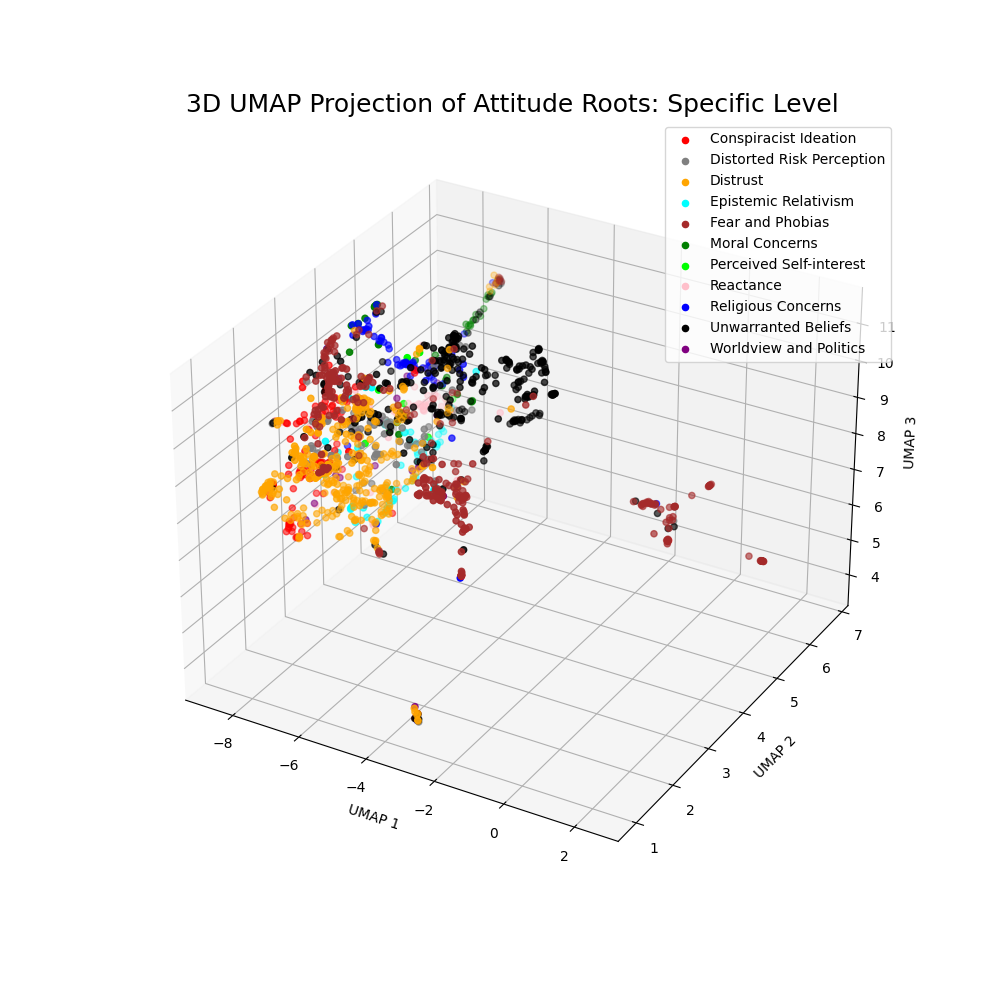

<IPython.core.display.Javascript object>


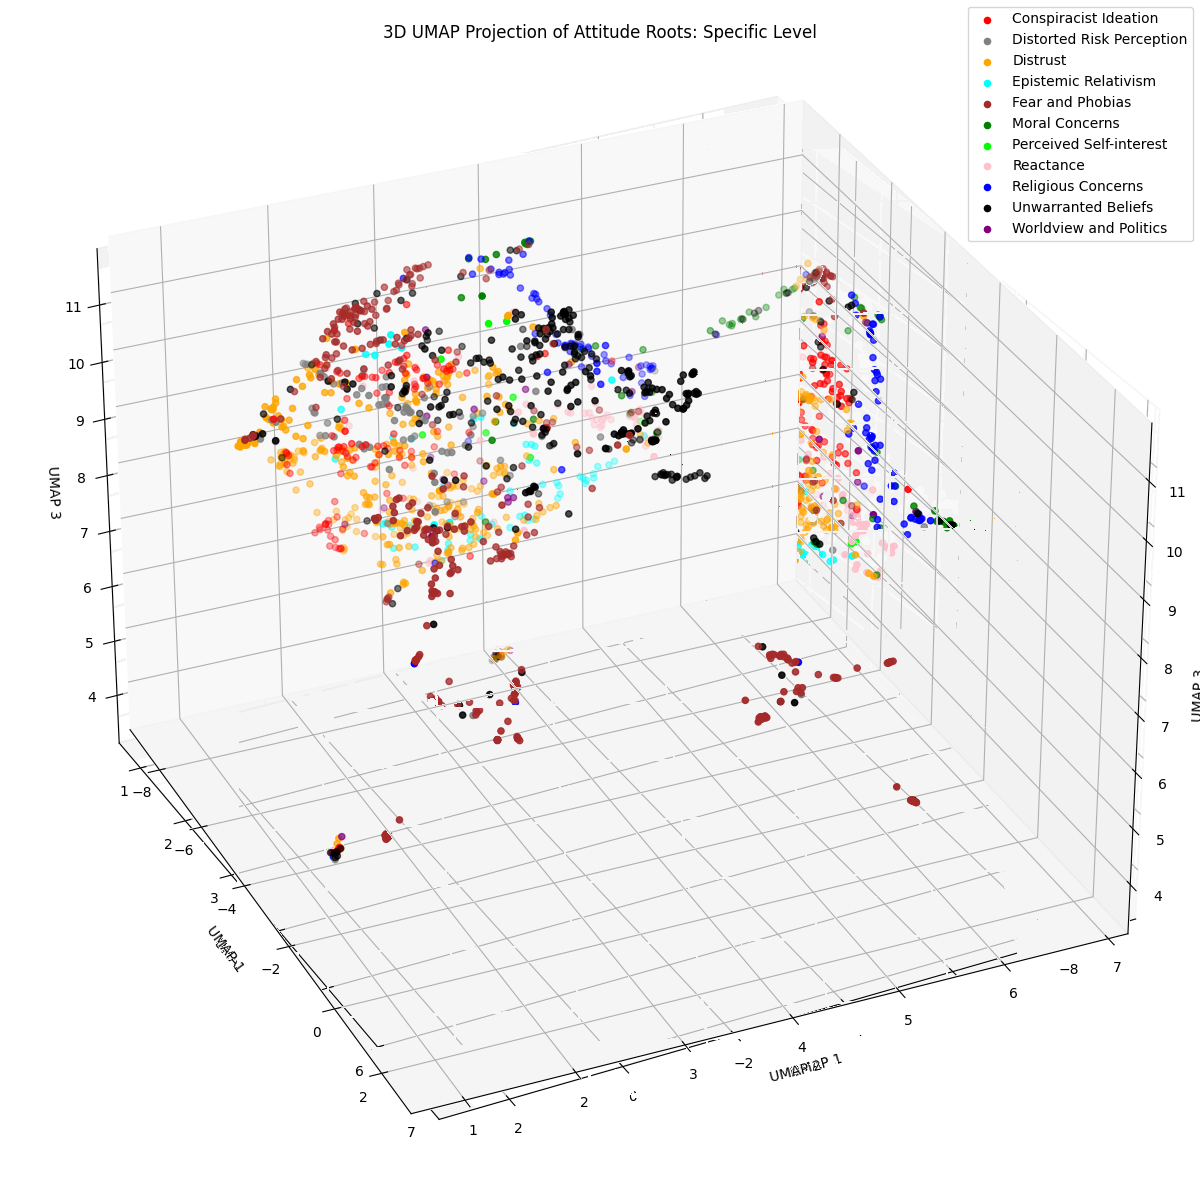

In [21]:
plot3dstuff(specific_single, specific_umap3, c_dict, '3D UMAP Projection of Attitude Roots: Specific Level')

## Abstract level

In [19]:
abstract = process_study1(processed_study1, 'Arguments: Abstract level')

/home/bates/Desktop/umap_plots/setup_utils.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Arguments: Specific level', 1)


In [20]:
abstract_single = get_single_label(abstract)

In [21]:
abstract_embeddings = model_st.encode(abstract_single.text.to_list())
abstract_single['text_labels'] = [roots[i] for i in abstract_single['single_labels'].to_list()]

In [22]:
abstract_2 = fit_2.fit_transform(abstract_embeddings)

In [23]:
plotstuff(abstract_single, abstract_2, c_dict, 'UMAP Projection of Attitude Roots: Abstract Level')

<IPython.core.display.Javascript object>

In [32]:
abstract_umap3 = fit_3.fit_transform(abstract_embeddings)

In [33]:
abstract_umap3.shape

(471, 3)

<IPython.core.display.Javascript object>


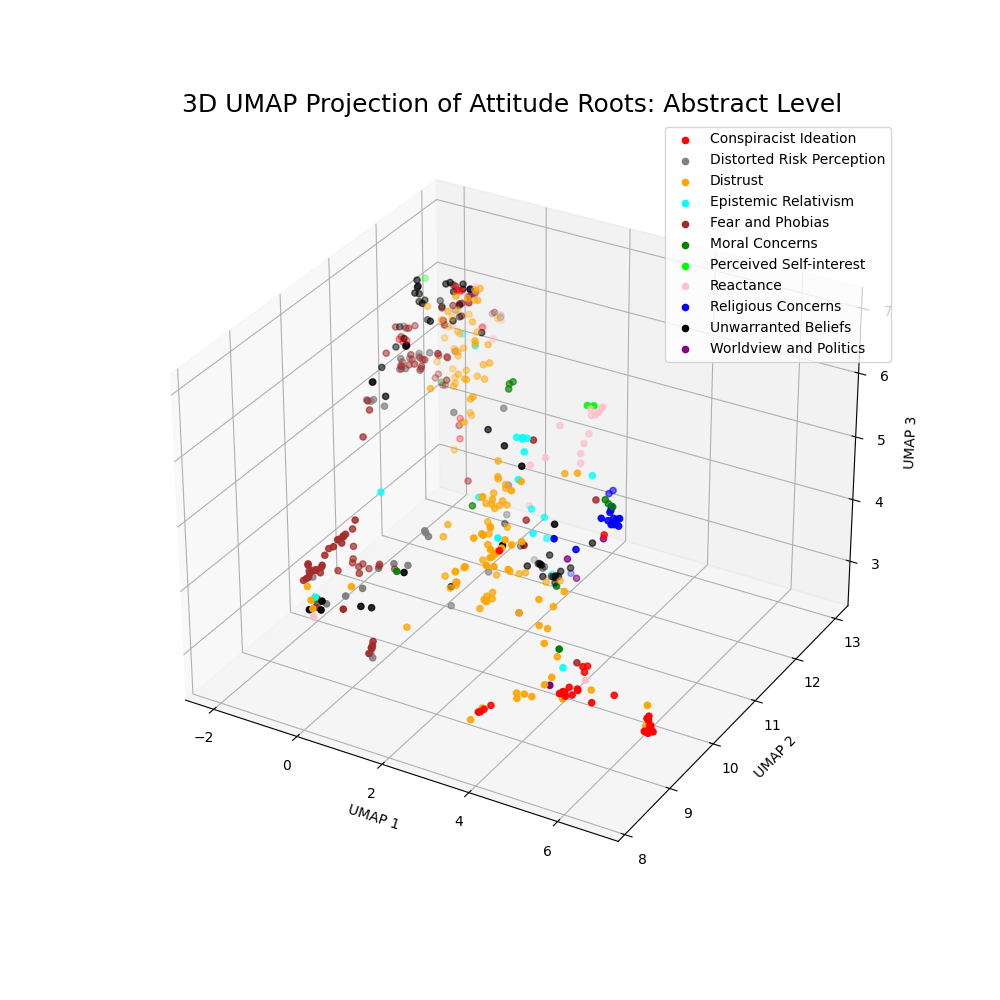

<IPython.core.display.Javascript object>


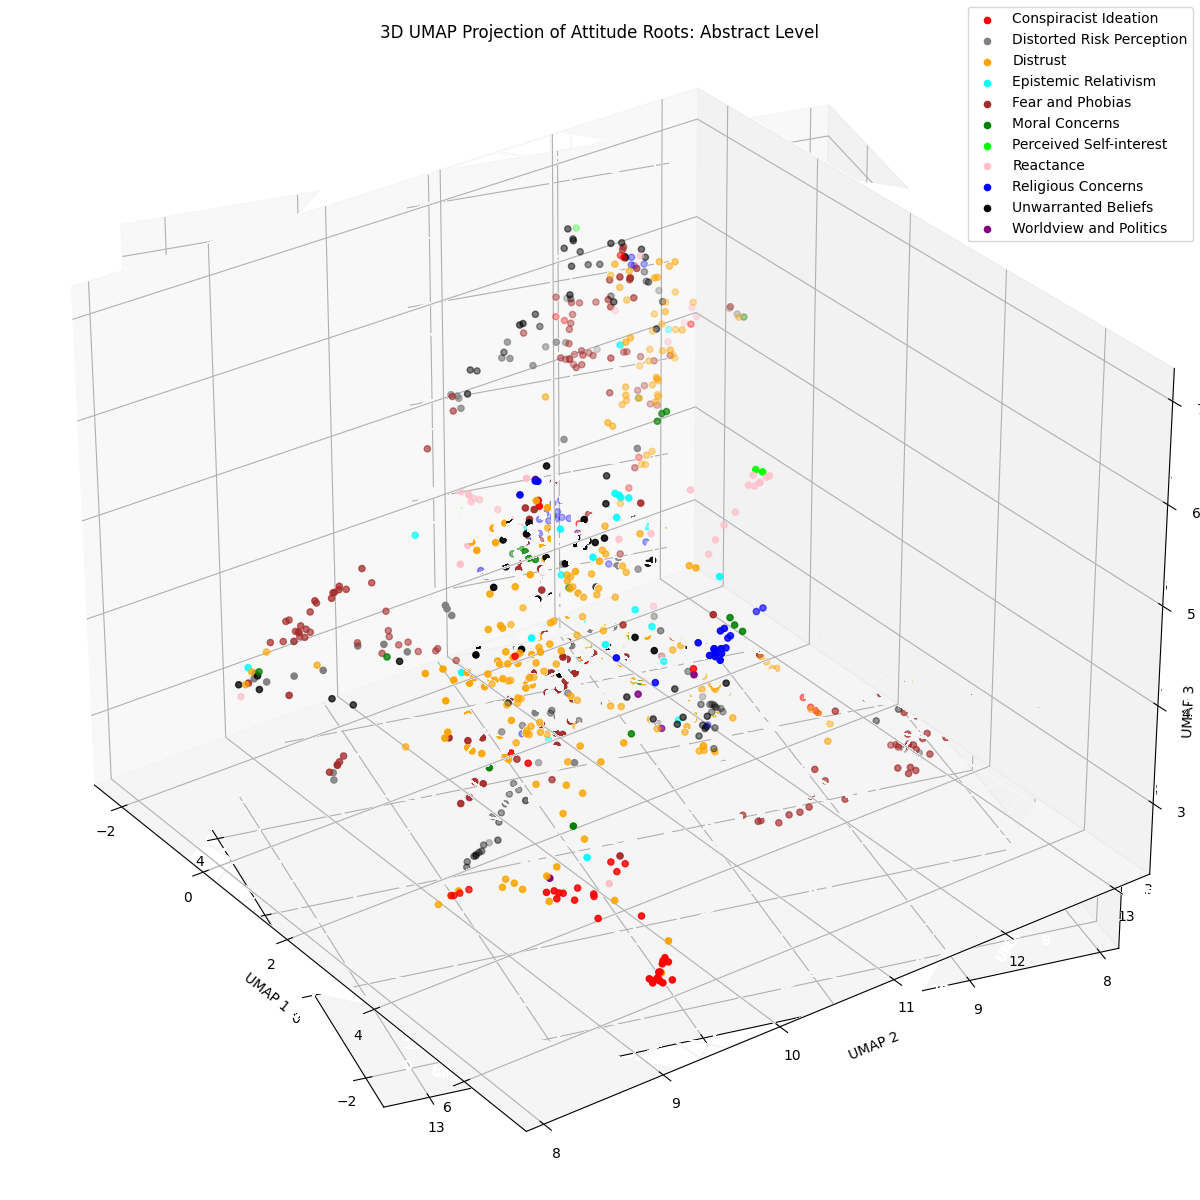

In [34]:
plot3dstuff(abstract_single, abstract_umap3, c_dict, '3D UMAP Projection of Attitude Roots: Abstract Level')

## Fact-checks

In [24]:
fact_checks = process_study2(study2)

/home/bates/Desktop/umap_plots/setup_utils.py:77: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0', 1)
/home/bates/Desktop/umap_plots/setup_utils.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('URL', 1)


In [25]:
fact_checks['text_labels'] = [roots[i] for i in fact_checks['single_labels'].to_list()]

In [ ]:
FC_embedding = model_st.encode(fact_checks.text.to_list())

## Supervised

In [38]:
sup_fc_embedding = fit_2.fit_transform(FC_embedding, y=fact_checks['single_labels'].to_list()) 

<IPython.core.display.Javascript object>


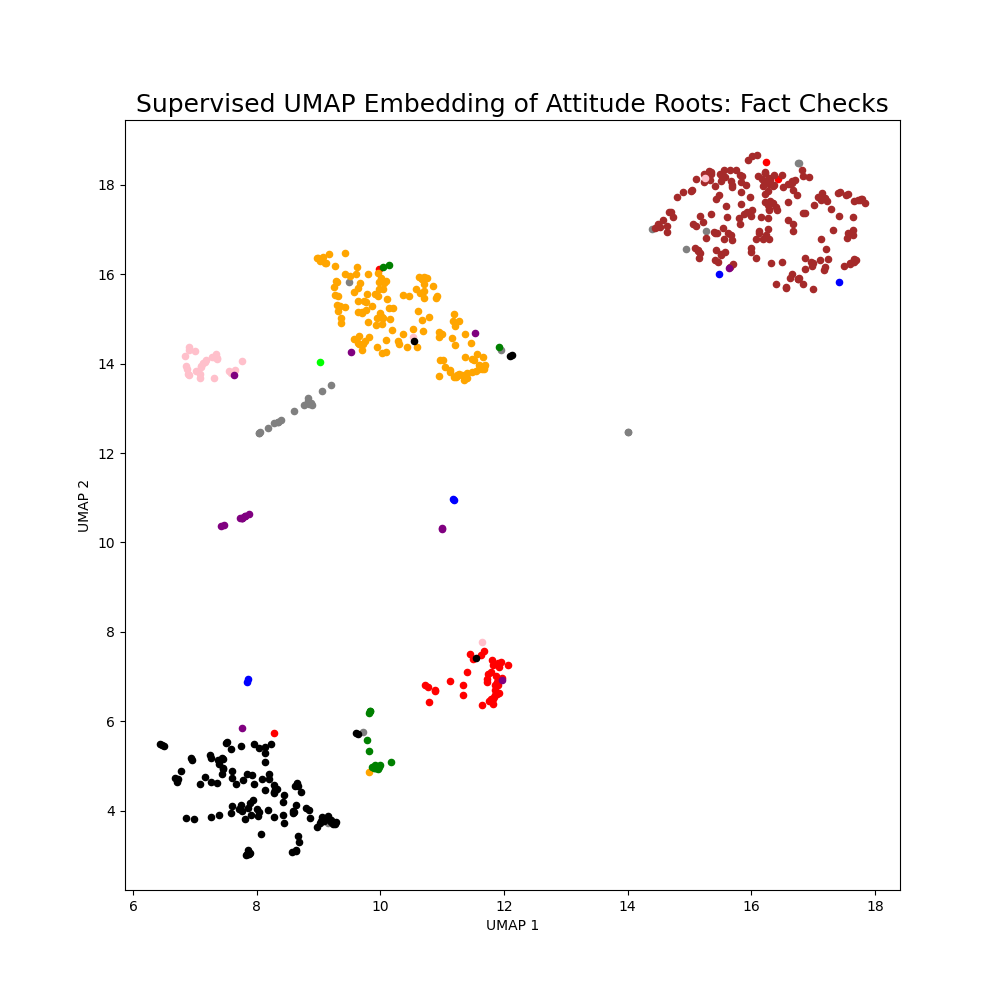

In [39]:
plotstuff(fact_checks, sup_fc_embedding, c_dict, 'Supervised UMAP Embedding of Attitude Roots: Fact Checks')

## Randomly supervised

In [40]:
from random import shuffle
random_fc = fact_checks.single_labels.to_list().copy()
set_seed()
shuffle(random_fc)
ran_sup_fc_embedding = fit_2.fit_transform(FC_embedding , y=random_fc)

<IPython.core.display.Javascript object>


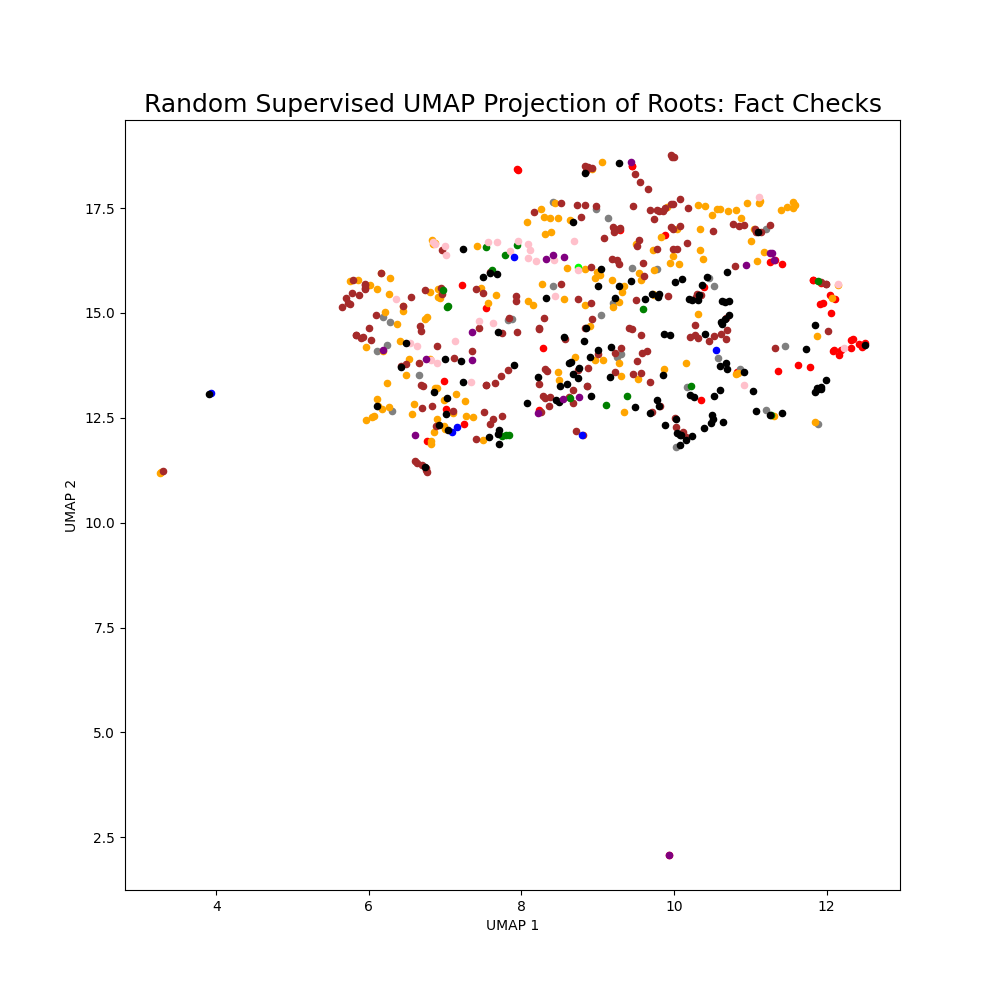

In [41]:
plotstuff(fact_checks, ran_sup_fc_embedding, c_dict, 'Random Supervised UMAP Projection of Roots: Fact Checks')

In [42]:
sup_fc_embedding3 = fit_3.fit_transform(FC_embedding, y=fact_checks['single_labels'].to_list()) 

<IPython.core.display.Javascript object>


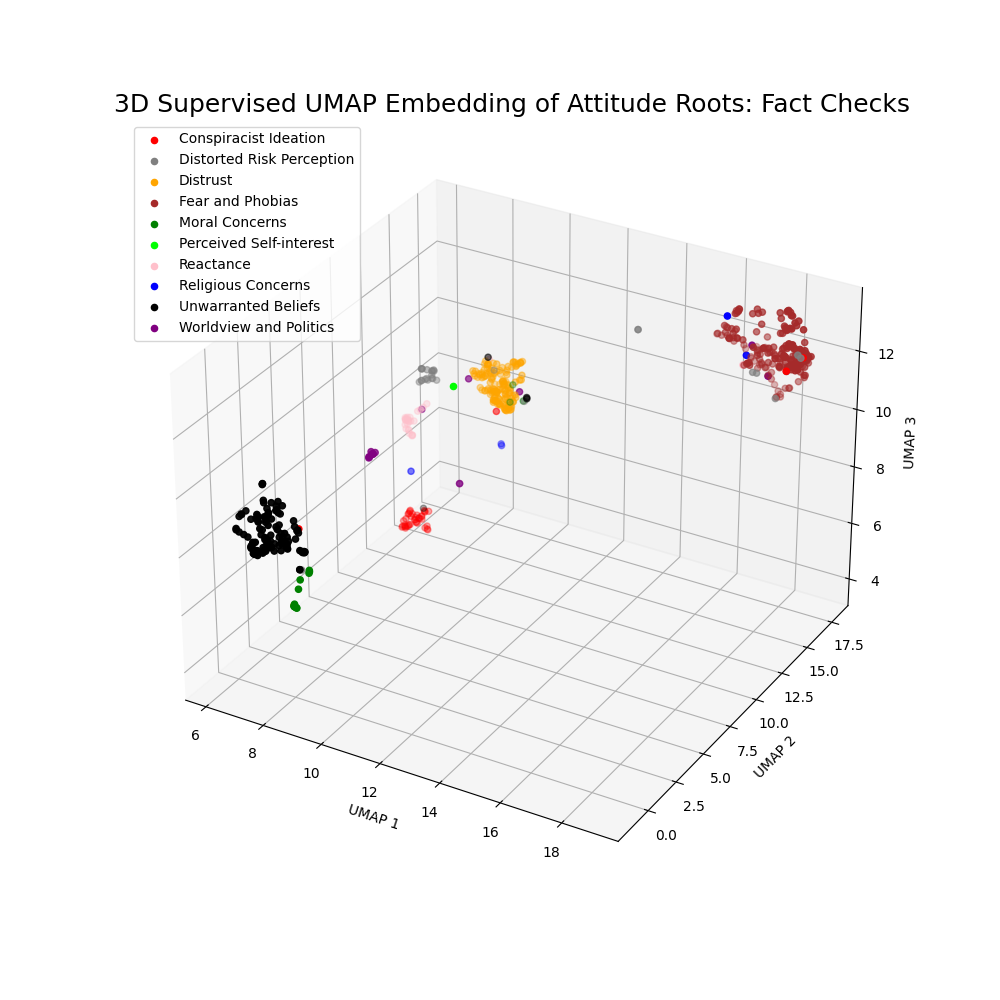

<IPython.core.display.Javascript object>


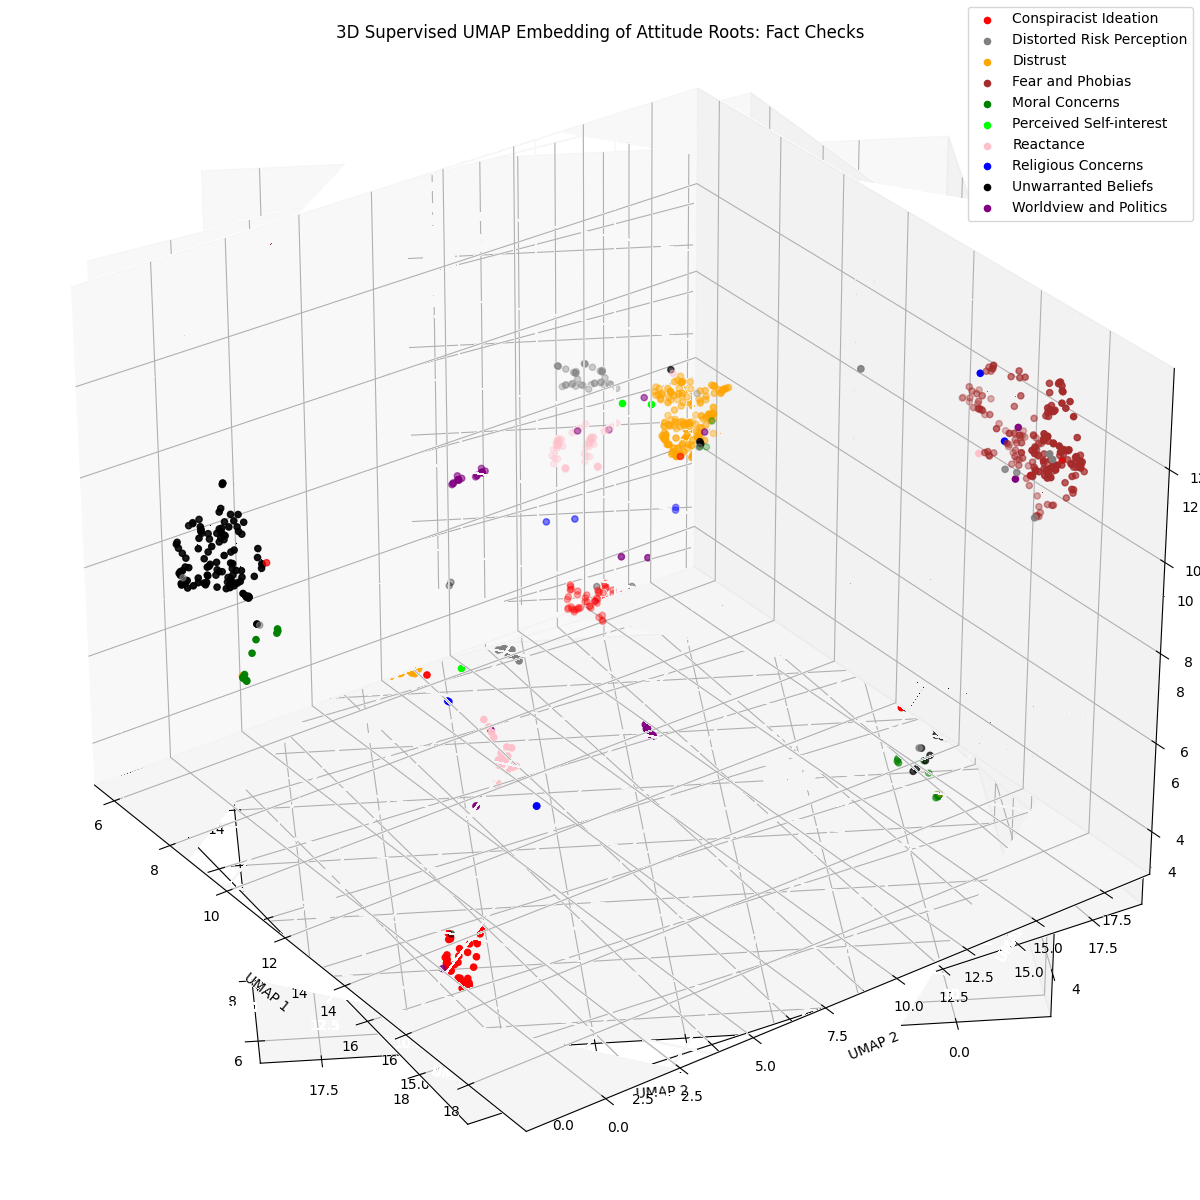

In [43]:
plot3dstuff(fact_checks, sup_fc_embedding3, c_dict, '3D Supervised UMAP Embedding of Attitude Roots: Fact Checks')

In [44]:
ran_fc_embedding3 = fit_3.fit_transform(FC_embedding, y=random_fc) 

<IPython.core.display.Javascript object>


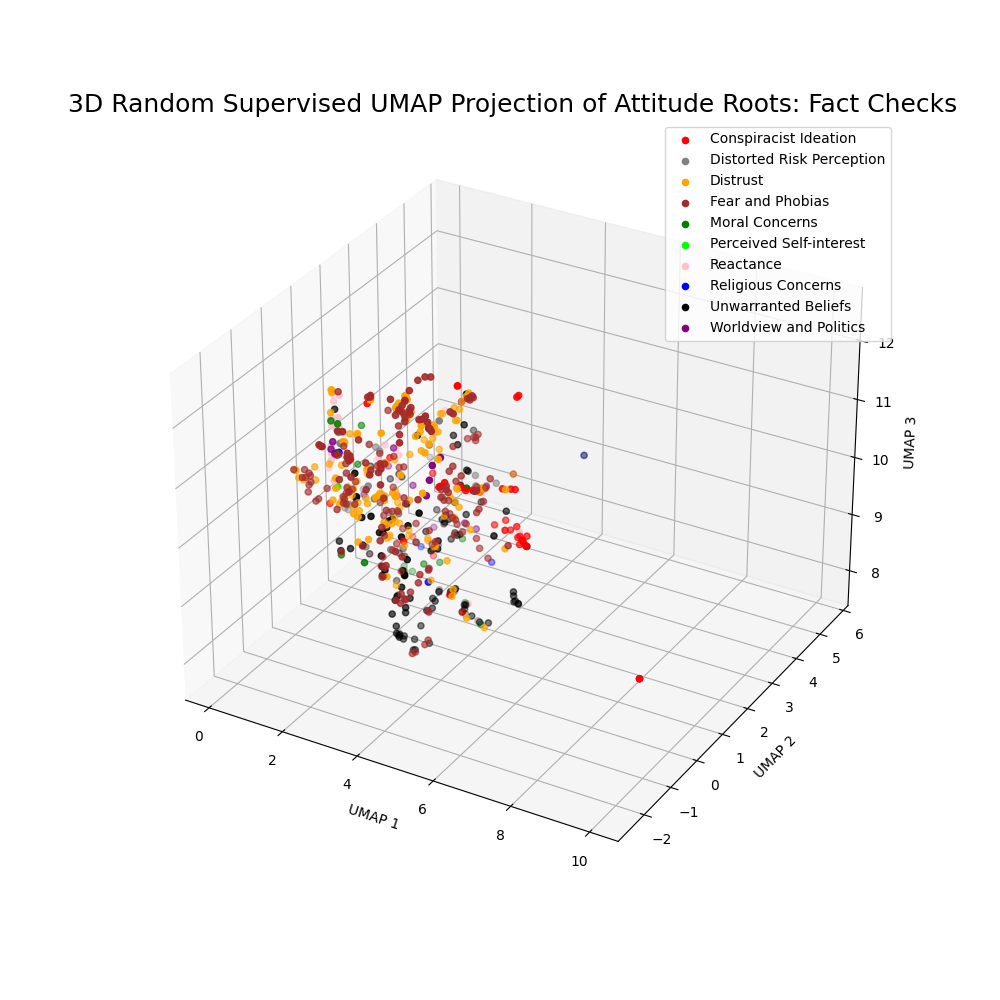

<IPython.core.display.Javascript object>


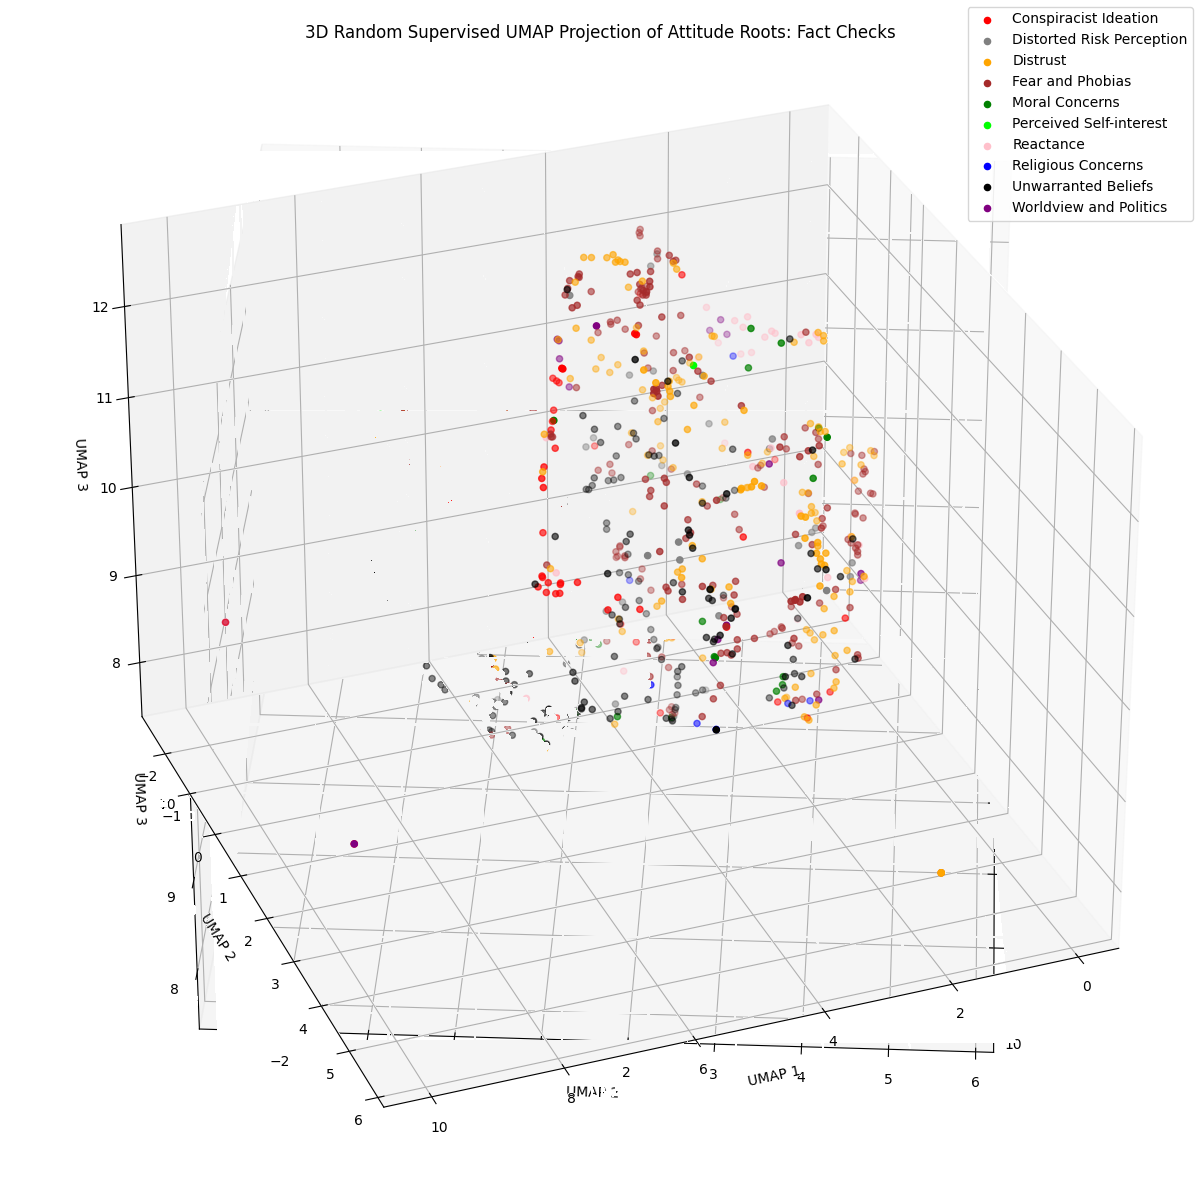

In [45]:
plot3dstuff(fact_checks, ran_fc_embedding3, c_dict, '3D Random Supervised UMAP Projection of Attitude Roots: Fact Checks')